In [262]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [263]:
!kaggle datasets download -d nelgiriyewithana/new-york-housing-market

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market
License(s): other
new-york-housing-market.zip: Skipping, found more recently modified local copy (use --force to force download)


In [264]:
!unzip new-york-housing-market.zip

Archive:  new-york-housing-market.zip
replace NY-House-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder , StandardScaler




In [266]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [268]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [269]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


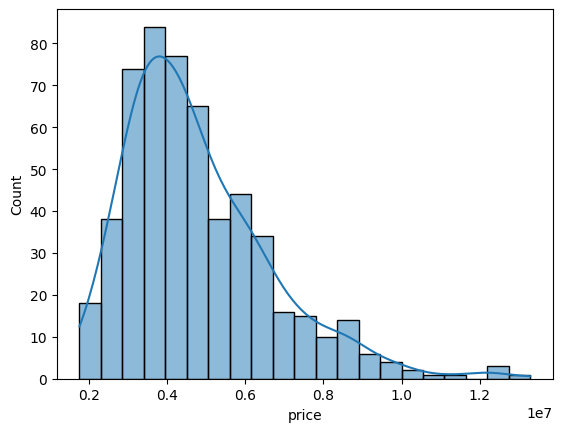

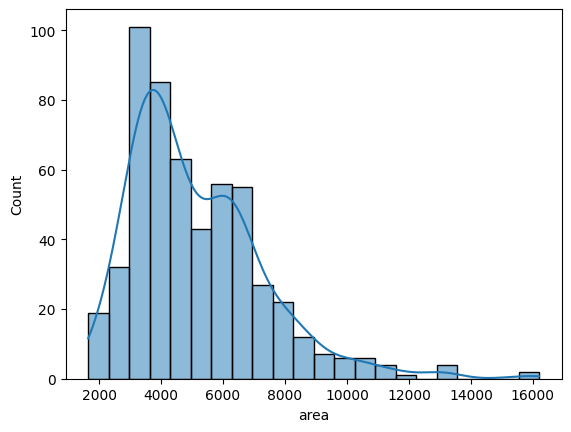

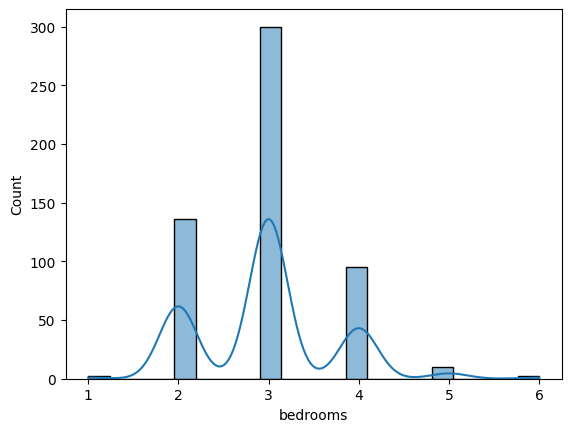

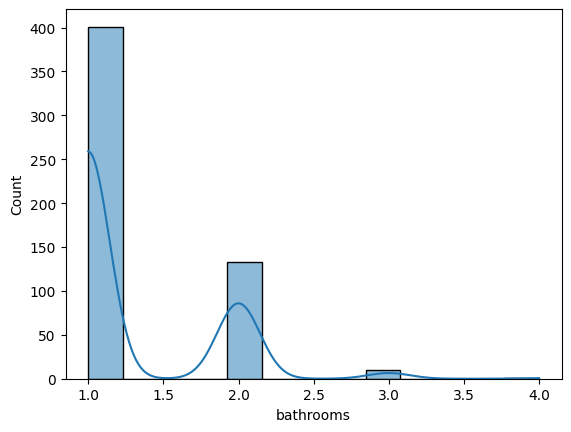

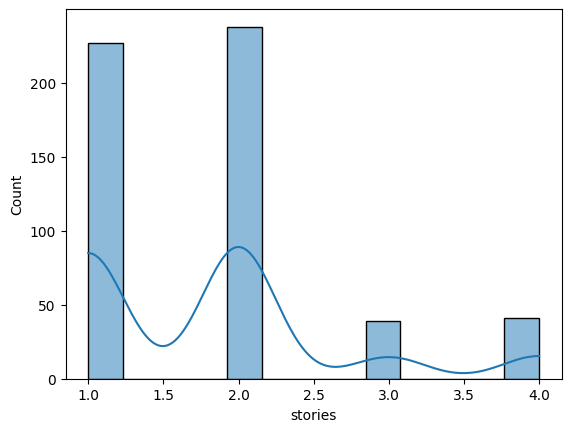

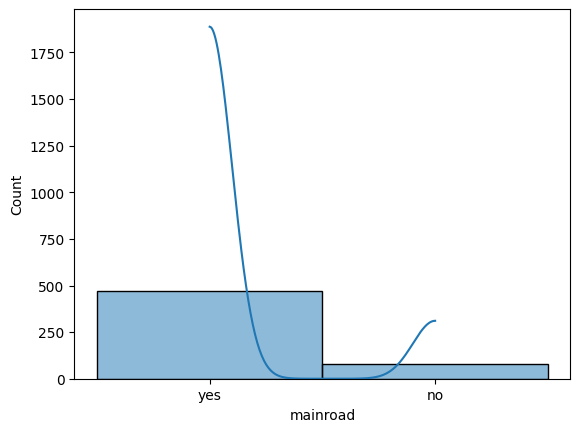

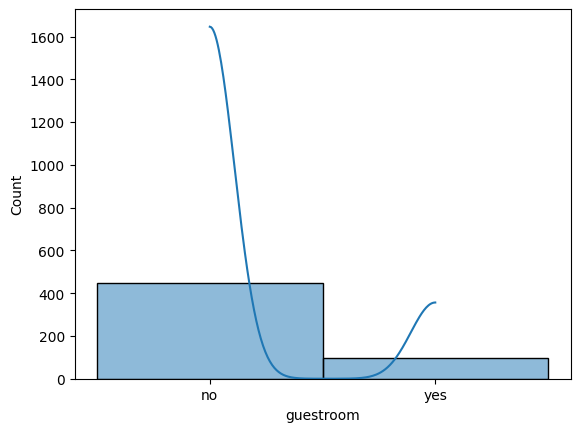

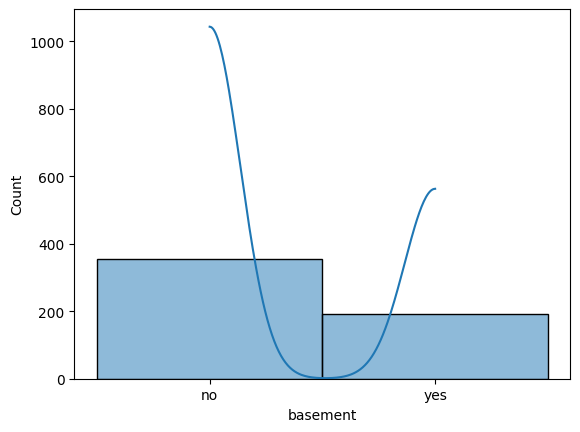

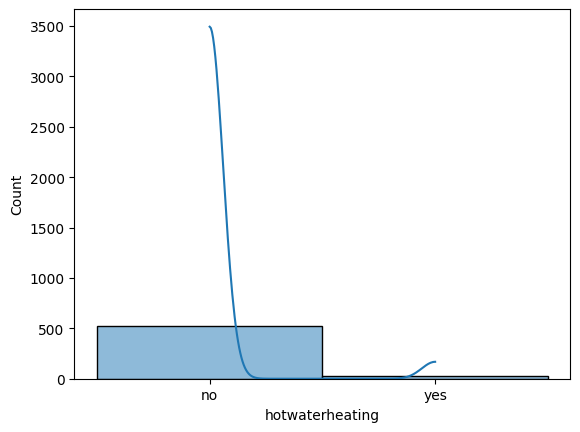

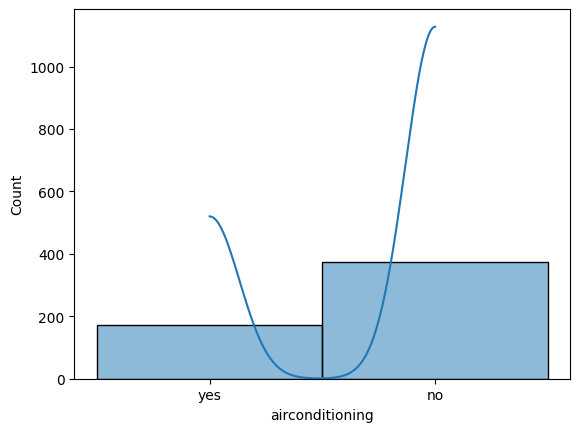

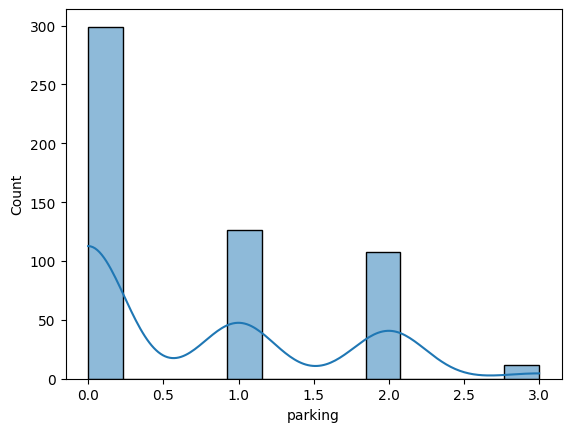

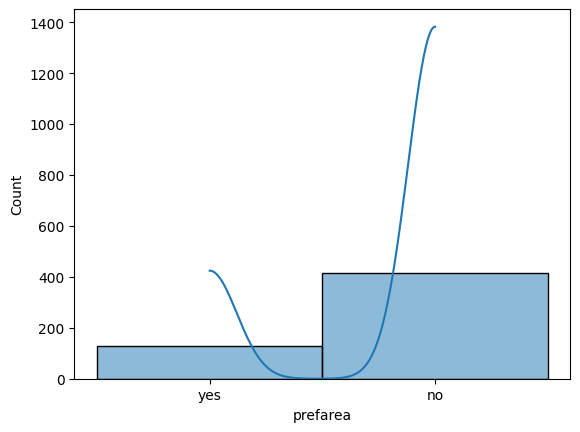

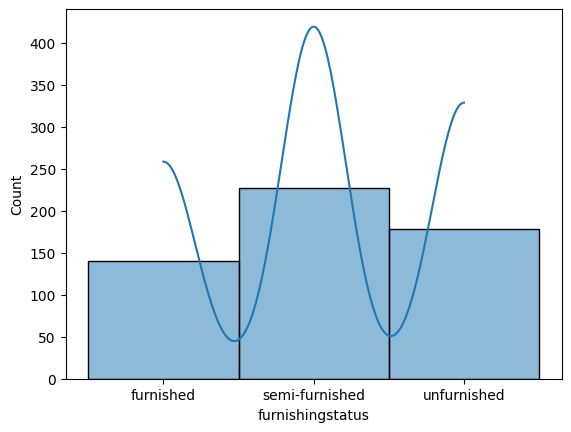

In [270]:
for col in df.columns:
  sns.histplot(df[col], kde=True)
  plt.show()


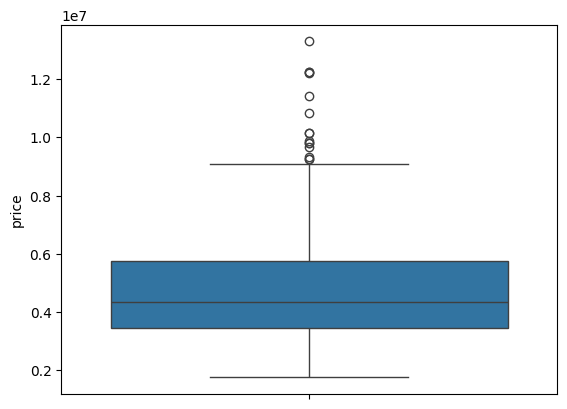

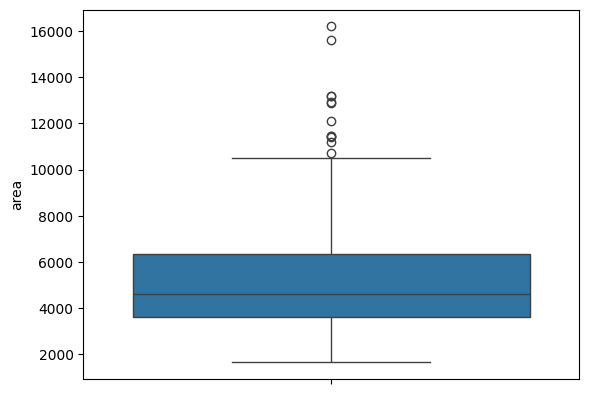

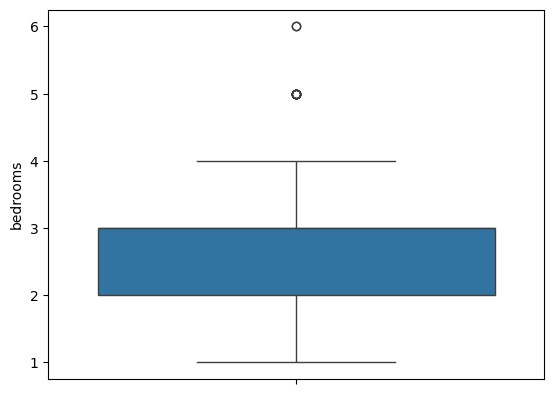

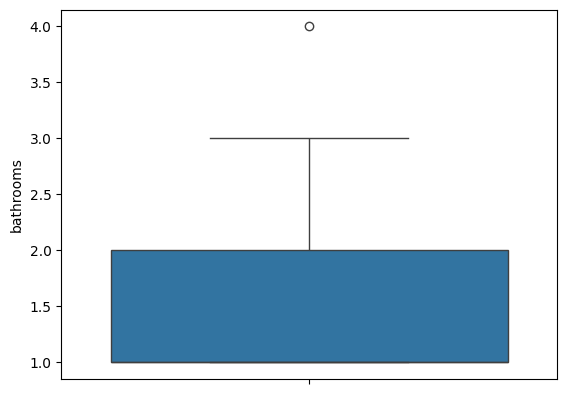

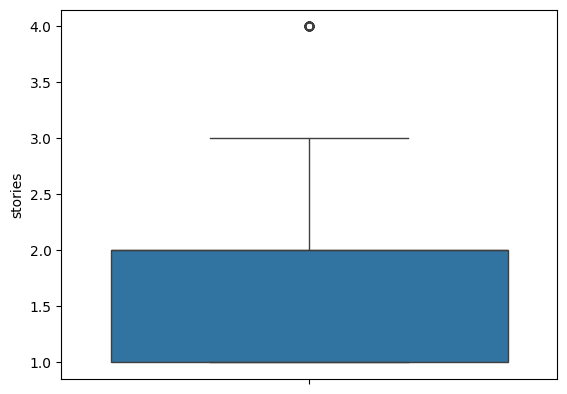

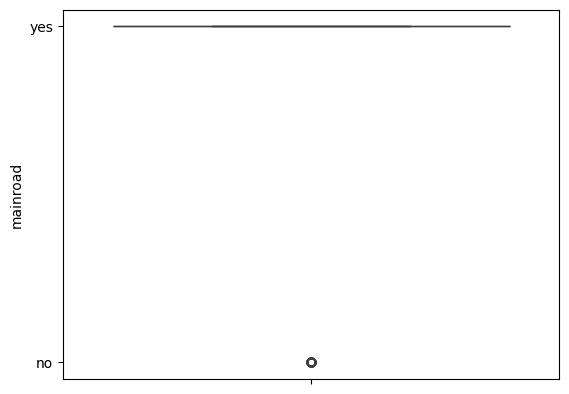

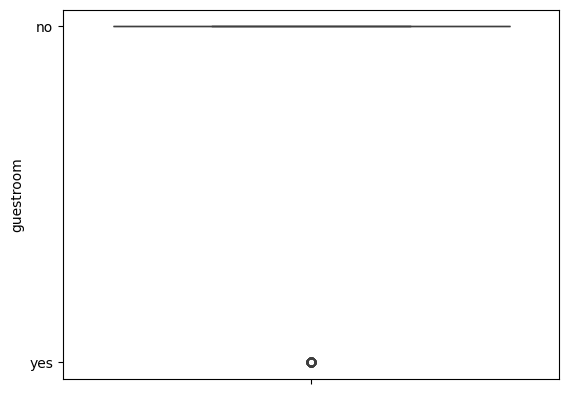

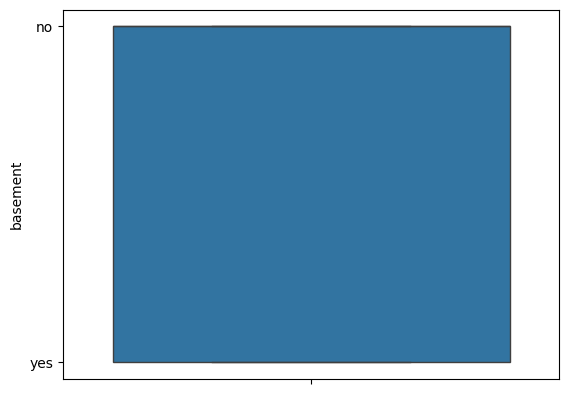

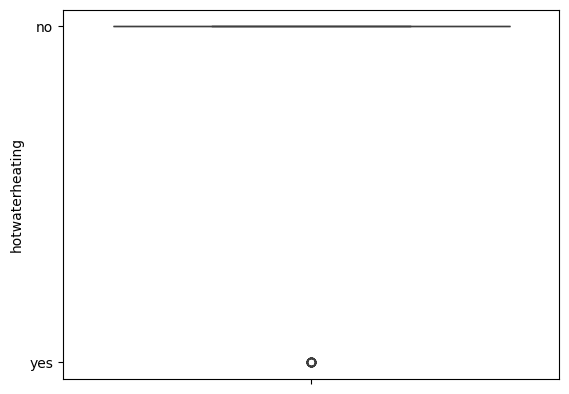

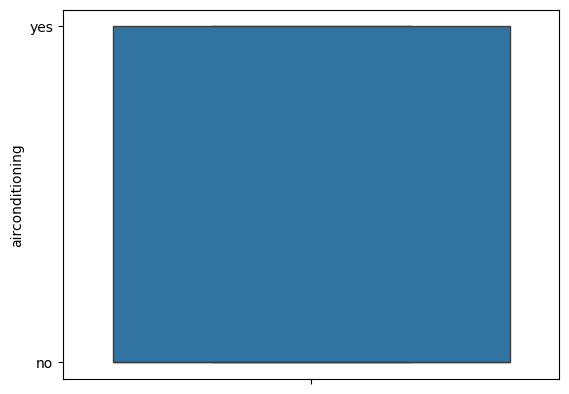

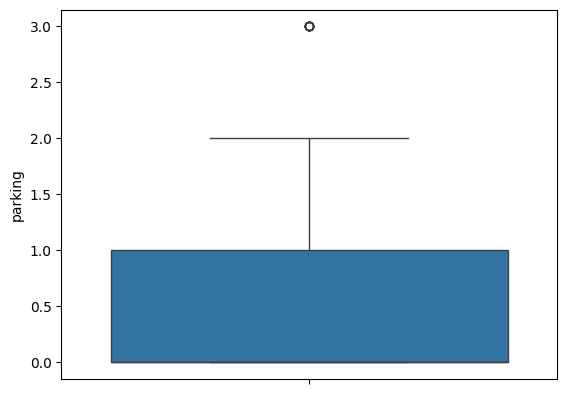

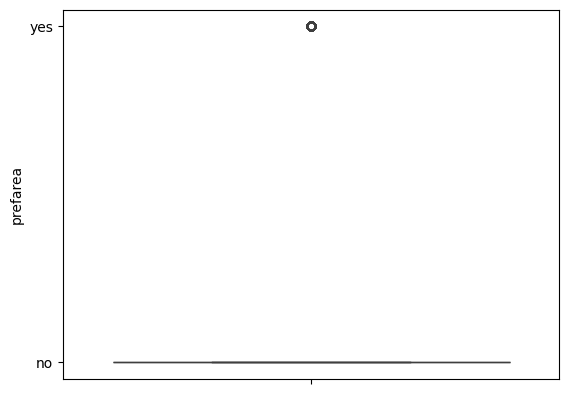

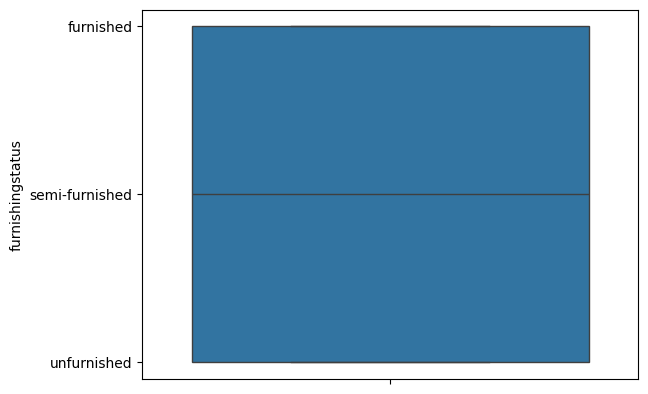

In [271]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

In [272]:
# prompt: want code to remove outliers from area and price

# Calculate the IQR for 'area' and 'price'
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter out outliers
df = df[
    (df['area'] >= lower_bound_area) & (df['area'] <= upper_bound_area) &
    (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)
]


In [273]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])



<ipython-input-273-727283cc8465>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-273-727283cc8465>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-273-727283cc8465>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

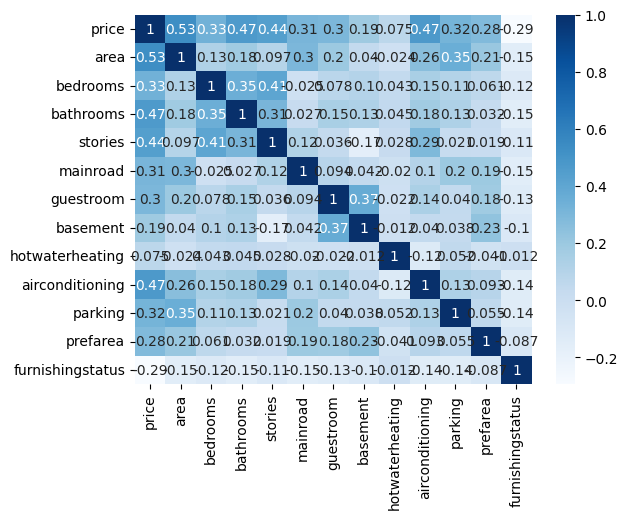

<Figure size 10000x10000 with 0 Axes>

In [274]:
corr = df.corr()
sns.heatmap(corr, annot=True , cmap = "Blues")
plt.figure(figsize=(100,100)) # Changed this line to pass figsize as a tuple.
plt.show()

In [281]:
 x = df.drop(["price", "hotwaterheating","guestroom"], axis=1)
 y = df["price"]

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [277]:
lr = LinearRegression()
lr.fit(x_train, y_train)


y_pred = lr.predict(x_test)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 678206855582.5544
R-squared: 0.7519011110506795


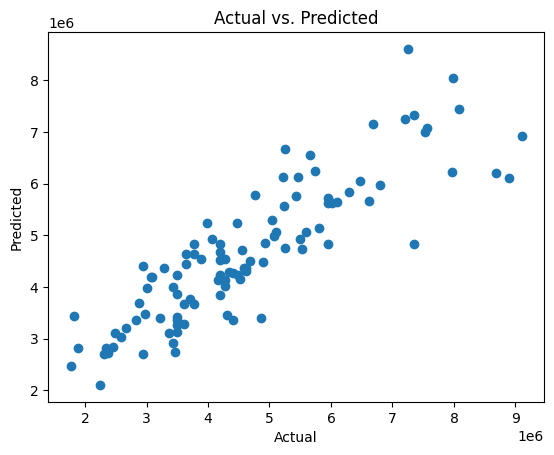

In [278]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


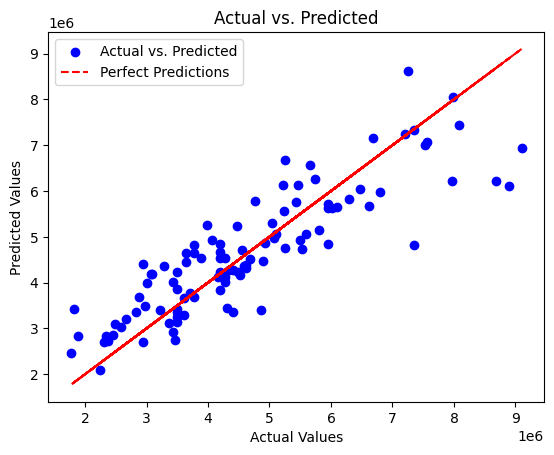

In [279]:

plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')

plt.legend()
plt.show()